#### Final Project Submission
* Student Name: JAMES WACHIRA MUTHEE
* Mode of Study: PART TIME
* Project: End of Phase Project
* Technical Mentor: Daniel Ekale


#### 1. Business Understanding
The increasing ease of online hotel reservations and flexible cancellation policies has led to a significant number of cancellations and no-shows, causing revenue loss and operational challenges for hotels. Predicting whether a customer will honor or cancel their reservation is crucial for effective booking management. By forecasting cancellations, hotels can take proactive measures such as overbooking, adjusting policies, or offering incentives to reduce cancellations, ultimately improving revenue, resource allocation, and customer satisfaction. This project aims to build a predictive model that helps hotels manage bookings more efficiently and reduce revenue loss.

#### 2. Problem Statement
Hotels face significant revenue loss and operational inefficiencies due to high rates of reservation cancellations and no-shows. The challenge is predicting which reservations are likely to be canceled, as this uncertainty impacts booking management and resource allocation. This project aims to develop a predictive model using historical booking data to forecast cancellations, enabling hotels to optimize revenue, reduce cancellations, and improve operational efficiency.

#### 3. Data
The Hotel Reservations dataset used in this project was obtained from https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset.

#### 4. Data Preparation and Cleaning
Before creating the model, the following steps will be taken:

* Import the relevant libraries 
* Load Hotel reservations datasets which is in csv
* Understand the data
* Identify and fix the missing values
* Ensure the columns have the correct data type
* Create new features that will be important for our analysis

#### 5. Data Pre-processing
This step will involve transforming raw data into a structured format suitable for modeling. Steps include:
1. Feature Scaling
2. Log Transformation
3. Categorical Encoding
4. Feature Engineering
5. Handling Imbalanced data
6. Data Splitting

#### 6. Modelling
This step will involve creating models to predict whether a customer will cancel a booking or not. Essentially, our model will be answering our business question. In this project, three models will be used: Logistic Regression, Decision Tree and Random Forest. We shall select a model, train our dataset and used the trained model to make predictions

#### 7. Evaluation of Model Metrics
This step will help us assess how well our model is performing. It will allow us to understand if the model is making accurate predictions and how it will generalize to unseen data. The Evaluation Metrics will depend on the models used

### 1. Import the Libraries

In [47]:
#import the relevant libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

### 2. Load the Dataset

In [2]:
#Loading the Dataset
df = pd.read_csv("Hotel_Reservations.csv")

#Checking the first five rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### 3. Data Understanding

In [3]:
#Checking the number of rows and columns
df.shape

print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 36275 rows and 19 columns


In [4]:
#Checking the column names
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
#Checking the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

This dataset has columns with Categorical,integers and Float data types. 5 Columns have Categorical data types, 13 Columns with integer data types and one column with Float Data type

In [6]:
#Checking for summary statistics of Numerical columns
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
#Checking for unique values in each column
df.nunique()

Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

In [8]:
#Checking for missing values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

This dataset has no missing values

### 4. Create Visualizations to Understand Data Distribution

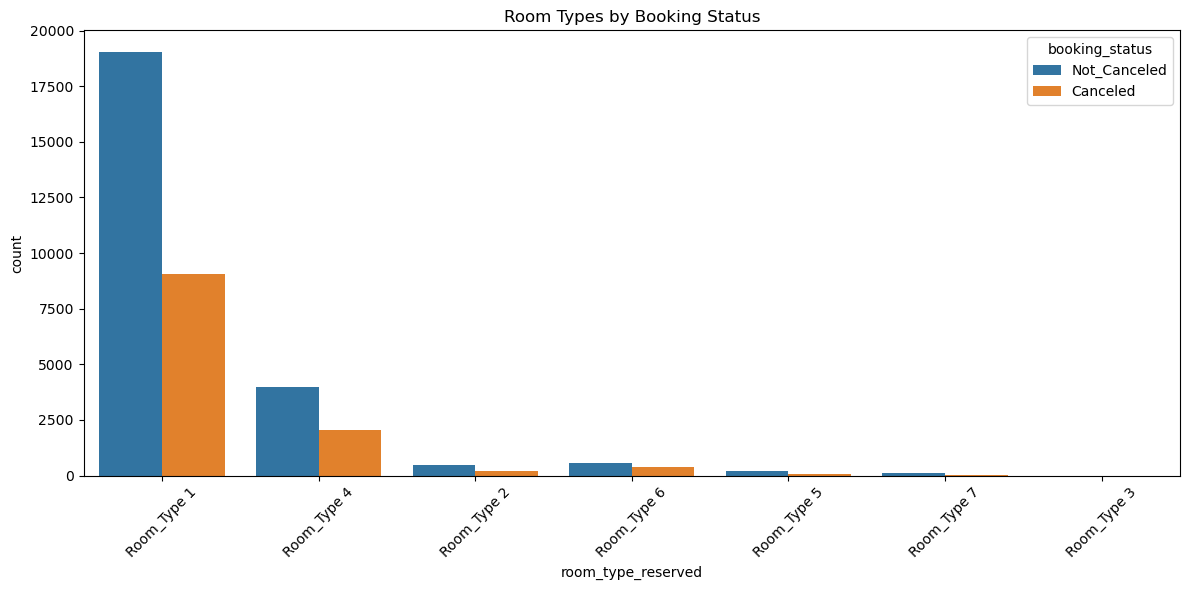

In [9]:
# Creating multiple visualizations to understand the data distribution

#Room Type and Booking Status
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='room_type_reserved', hue='booking_status')
plt.title('Room Types by Booking Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This chart shows the distribution of room types by booking status, highlighting which room types are more likely to be canceled or not.

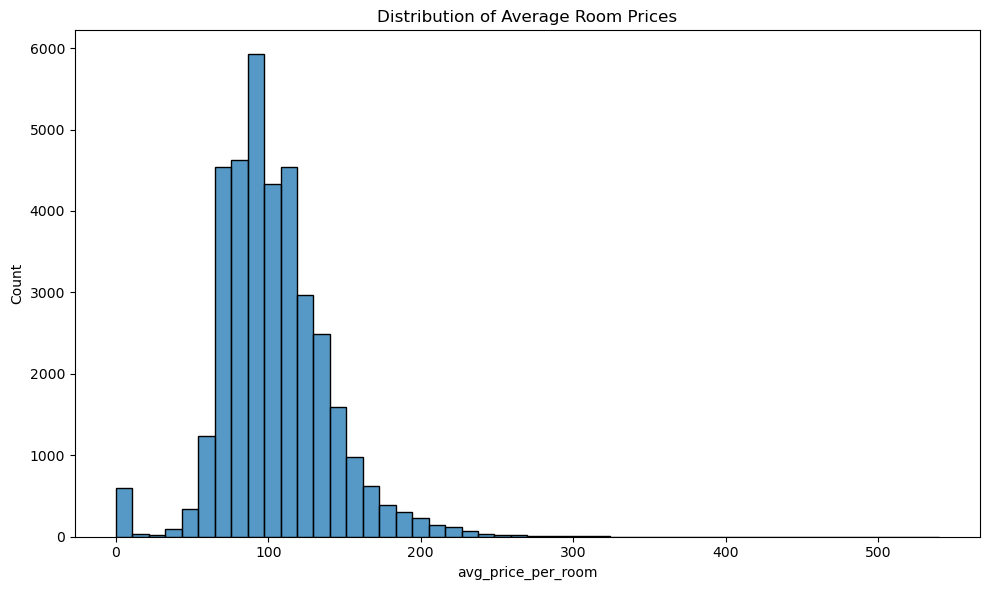

In [10]:
#Average Room Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_price_per_room', bins=50)
plt.title('Distribution of Average Room Prices')
plt.tight_layout()
plt.show()

This chart displays the distribution of average room prices, showing the spread and concentration of pricing.

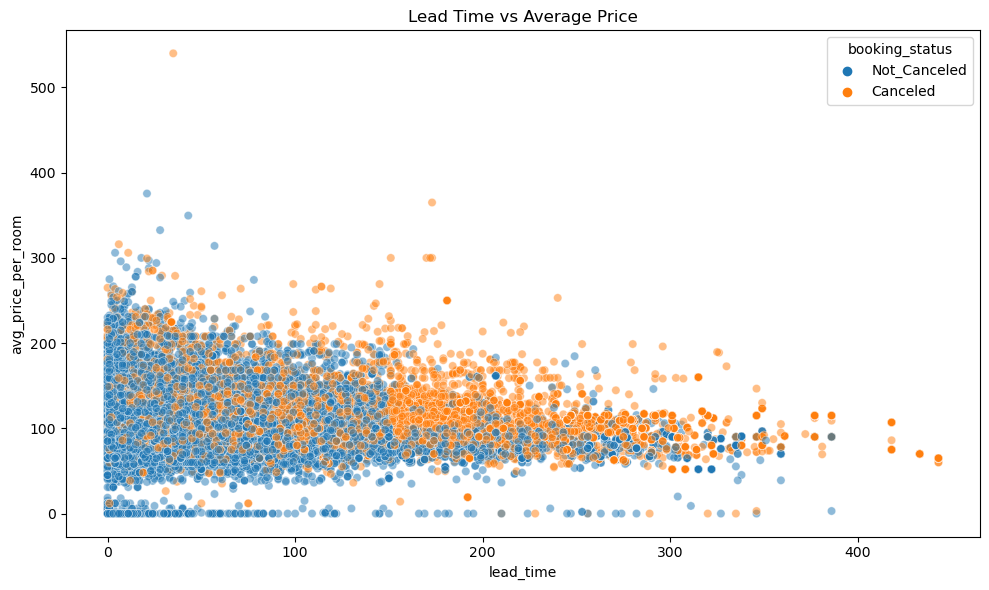

In [11]:
#Lead Time vs Price with Booking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='lead_time', y='avg_price_per_room', hue='booking_status', alpha=0.5)
plt.title('Lead Time vs Average Price')
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between lead time and average price, with booking status as a hue.

<Figure size 1200x600 with 0 Axes>

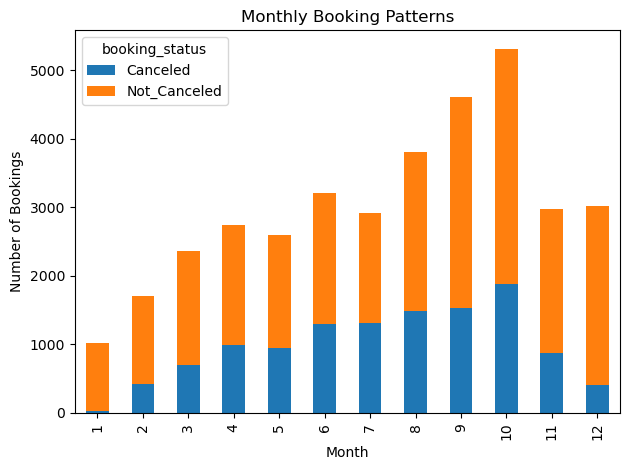

In [12]:
#Monthly Booking Patterns
plt.figure(figsize=(12, 6))
monthly_bookings = df.groupby(['arrival_month', 'booking_status']).size().unstack()
monthly_bookings.plot(kind='bar', stacked=True)
plt.title('Monthly Booking Patterns')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

This chart shows monthly booking patterns, with stacked bars for canceled and not canceled bookings.

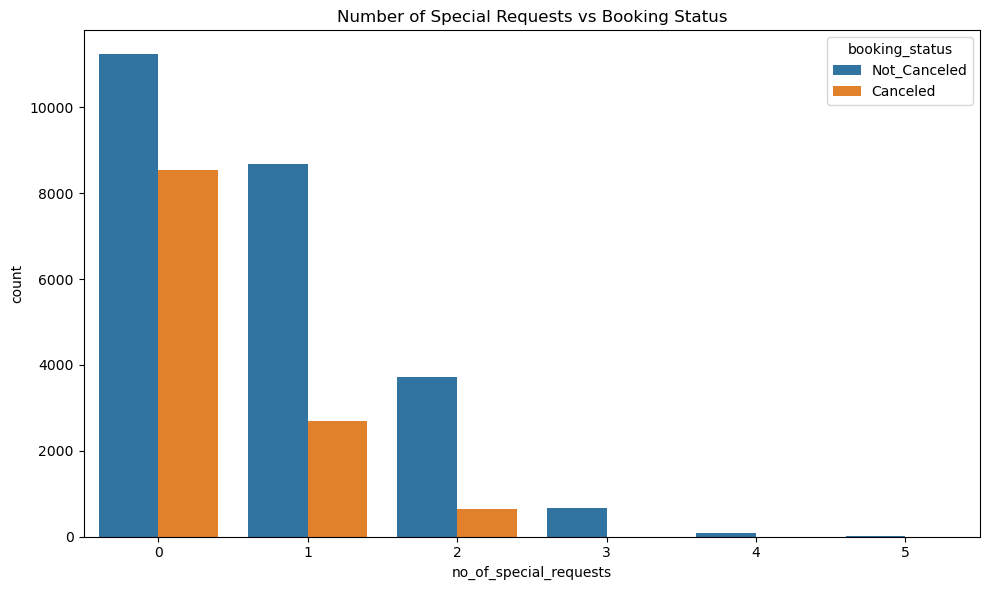

In [13]:
#Special Requests Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status')
plt.title('Number of Special Requests vs Booking Status')
plt.tight_layout()
plt.show()

This chart highlights the number of special requests and their relationship with booking status.

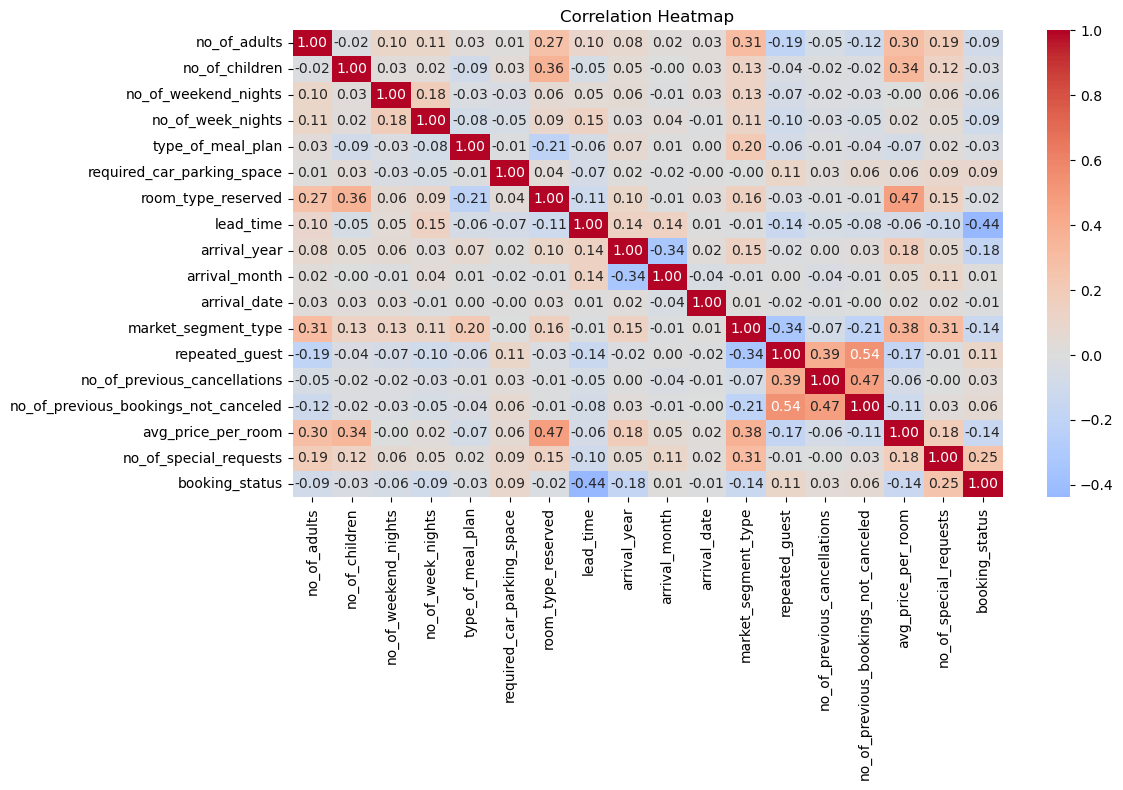

In [14]:
# Remove non-numeric columns that won't be used for correlation
columns_to_drop = ['Booking_ID']
df_analysis = df.drop(columns=columns_to_drop)

# Convert categorical variables to numeric
le = LabelEncoder()
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for col in categorical_cols:
    df_analysis[col] = le.fit_transform(df_analysis[col])

# Calculate correlations
correlations = df_analysis.corr()['booking_status'].sort_values(ascending=False)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_analysis.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

The Heatmap chart shows the correlation of all the numeric variables agaisnt the target variable, the Booking status. This Heatmap will be crucial in helping us identify the most important features to use in our modelling. In addition to the correlation, features will be selected based on their on whether they make business sense when predicting cancellations

### 5. CREATING MODELS
After loading our data, understanding it and doing some EDA and visualizations to understand the data distribution, it's now time to delve into creating models that we shall use to predict booking cancellations. Three Models will be created, evaluated and tuned until we get the best model that we shall use for our to to solve our business problem. These models are
1. Logistic Regression Model
2. Decision Tree Model
3. Random Forest Model

### A. Baseline Logistic Regression Model

In [15]:
# Selecting columns to use for creating the model
selected_columns = ['no_of_adults', 'avg_price_per_room', 'repeated_guest', 
                    'market_segment_type', 'lead_time', 'arrival_year', 
                    "no_of_special_requests",'booking_status']


# Creating a copy of the DataFrame
data = df[selected_columns].copy()

In [16]:
#checking the first few rows of the dataframe
data.head()

,no_of_adults,avg_price_per_room,repeated_guest,market_segment_type,lead_time,arrival_year,no_of_special_requests,booking_status
0,2,65.00,0,Offline,224,2017,0,Not_Canceled
1,2,106.68,0,Online,5,2018,1,Not_Canceled
2,1,60.00,0,Online,1,2018,0,Canceled
3,2,100.00,0,Online,211,2018,0,Canceled
4,2,94.50,0,Online,48,2018,0,Canceled


In [17]:
# Calculate skewness for each numeric column
skewness = data.select_dtypes(include=[np.number]).skew()

# Set a threshold for considering columns for log transformation
threshold = 5
skewed_columns = skewness[abs(skewness) > threshold].index

# Display the skewed columns
print("Columns with high skewness (candidates for log transformation):")
print(skewed_columns)

Columns with high skewness (candidates for log transformation):
Index(['repeated_guest'], dtype='object')


This shows that repeated guest column requires log transformation since it is highly skewed

In [18]:
# Define the columns for log transformation
log_transform_columns = ['repeated_guest']

# Create a custom transformer for log transformation
log_transformer = ColumnTransformer(
    transformers=[
        ('log', FunctionTransformer(np.log1p, validate=True), log_transform_columns)
    ],
    remainder='passthrough')

# Encoding the target variable (booking_status) using LabelEncoder
label_encoder = LabelEncoder()
data['booking_status'] = label_encoder.fit_transform(data['booking_status'])


In [19]:
#Confirming label encoding for target variable
data.head()

,no_of_adults,avg_price_per_room,repeated_guest,market_segment_type,lead_time,arrival_year,no_of_special_requests,booking_status
0,2,65.00,0,Offline,224,2017,0,1
1,2,106.68,0,Online,5,2018,1,1
2,1,60.00,0,Online,1,2018,0,0
3,2,100.00,0,Online,211,2018,0,0
4,2,94.50,0,Online,48,2018,0,0


In [20]:
#Identifying categorical variables for OneHotEncoding
categorical_columns = ['market_segment_type']

#OneHotEncoding categorical variables
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True, dtype=int)

#Splitting the dataset into training and testing sets
X = data.drop('booking_status', axis=1)
y = data['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of train and test datasets
print("Data Split Overview:")
print(f"Number of training samples (features): {X_train.shape[0]}")
print(f"Number of training samples (target): {y_train.shape[0]}")
print(f"Number of testing samples (features): {X_test.shape[0]}")
print(f"Number of testing samples (target): {y_test.shape[0]}")

Data Split Overview:
Number of training samples (features): 29020
Number of training samples (target): 29020
Number of testing samples (features): 7255
Number of testing samples (target): 7255


In [21]:
#Checking the first few rows of our feature training data
X_train.head()

,no_of_adults,avg_price_per_room,repeated_guest,lead_time,arrival_year,no_of_special_requests,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
25629,2,161.00,0,26,2017,0,0,0,0,1
14473,2,121.50,0,98,2018,2,0,0,0,1
23720,2,70.00,0,433,2018,0,0,0,1,0
5843,2,72.25,0,195,2018,0,0,0,1,0
18709,1,130.00,0,188,2018,0,0,0,1,0


#### Creating a Pipeline

In [22]:
# Creating a pipeline for Logistic Regression
pipeline = Pipeline([('log_transform', log_transformer),
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression(random_state=42,
     solver='lbfgs',penalty='l2'))])

# Fitting the pipeline to the training data
pipeline.fit(X_train, y_train)

# Making predictions on the test set
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]


### Evaluating the Baseline Logistic Regression Model
* We shall measure the performance of the baseline logistic regression model using appropriate metrics and visualize the results

In [23]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_true=y_test, y_pred=y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.61      0.67      2416
           1       0.82      0.90      0.86      4839

    accuracy                           0.80      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



### Model Performance Explanation
#### 1. For Class 0 (Cancellations):
* Precision: 0.75 (75%)
Of all bookings predicted as cancellations, 75% were actually cancelled. This means when the model predicts a cancellation, it's right 75% of the time
* Recall: 0.61 (61%)
Of all actual cancellations, the model correctly identified 61%. This means the model catches about half of all real cancellations
This means the model catches more than half of all real cancellations
* F1-score: 0.67 (67%)
The harmonic mean of precision and recall.Provides a balanced measure between precision and recall

#### 2. For Class 1 (Non-Cancellations):
* Precision: 0.82 (82%)
Of all bookings predicted as non-cancellations, 82% were actually honored
* Recall: 0.90 (90%)
Of all actual non-cancellations, the model correctly identified 90%. Very high recall indicates the model is excellent at identifying honored bookings
* F1-score: 0.86 (86%)
Strong F1-score indicates good balance between precision and recall for non-cancellations

#### 3. Overall Metrics:

* Accuracy: 0.80 (80%)
The model correctly predicts 80% of all cases.This means 80 out of 100 predictions are correct



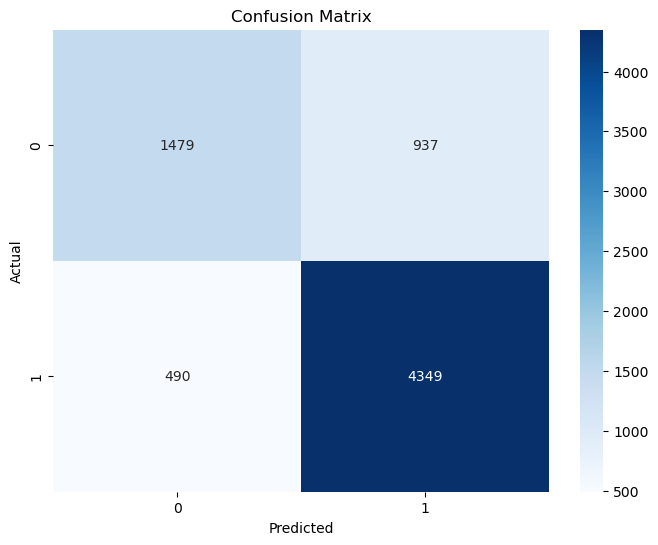

In [24]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpreting the confusion matrix:
1. True Negatives: 1,479 bookings correctly predicted as cancellations
2. False Positives: 937 bookings incorrectly predicted as non-cancellations
3. False Negatives: 490 bookings incorrectly predicted as cancellations
4. True Positives: 4,349 bookings correctly predicted as non-cancellations

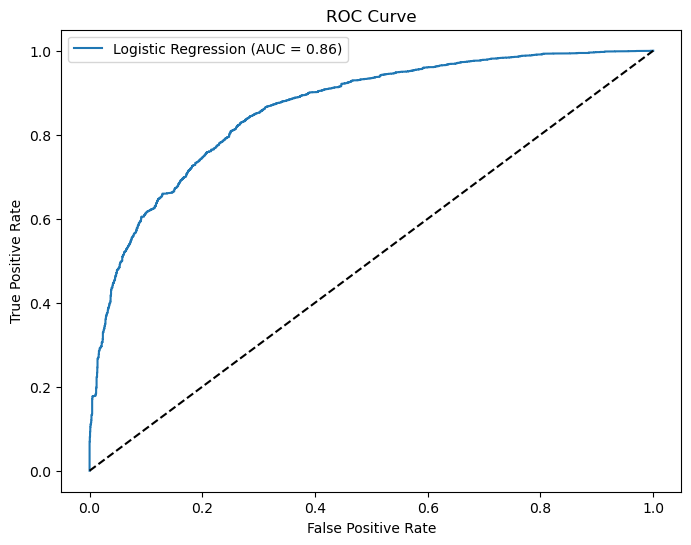

In [25]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = ' + str(round(roc_auc_score(y_test, y_pred_proba), 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

The AUC (Area Under Curve) score is 0.86 (86%) which is a good discriminative ability


### B. Decision Tree Model

In [26]:
# Creating a function to preprocess the data
def preprocess_data(df, selected_columns, target_column, categorical_columns):
    data = df[selected_columns].copy()
    label_encoder = LabelEncoder() # Label encode the target variable
    data[target_column] = label_encoder.fit_transform(data[target_column])
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)  # One-hot encode categorical variables

    return data


In [27]:
# Function to create and evaluate a decision tree model
def decision_tree_model(data, target_column):
    X = data.drop(target_column, axis=1)
    y = data[target_column]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the dataset into training and testing sets

In [28]:
#Creating a pipeline for Decision Tree
pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('decision_tree', DecisionTreeClassifier(random_state=42))
    ])

#Fitting the pipeline to the training data
pipeline.fit(X_train1, y_train1)

#Making predictions on the test set
y_pred1 = pipeline.predict(X_test1)
y_pred_proba1 = pipeline.predict_proba(X_test1)[:, 1]

In [29]:
# Evaluating the model
print("Classification Report:")
print(classification_report(y_test1, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      2416
           1       0.90      0.88      0.89      4839

    accuracy                           0.85      7255
   macro avg       0.83      0.84      0.84      7255
weighted avg       0.85      0.85      0.85      7255



The model achieved an accuracy of 85%. However it seemed to accurately predict non_cancellations more(90%) than cancellations (77%). This could be as a result of class imbalance. I shall check the class distribution to see if there is any class imbalance.To do this, we will calculate the distribution of the target variable (booking_status) to see if one class significantly outweighs the other. 

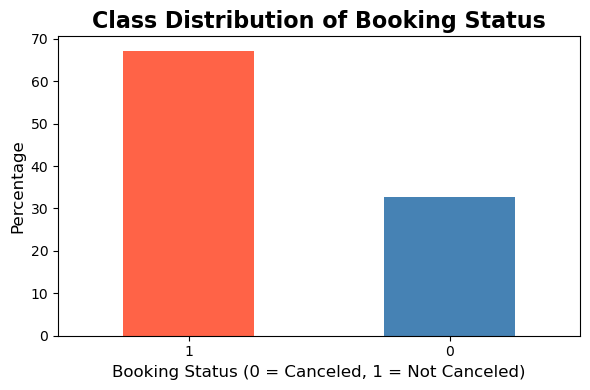

Class Distribution (%):
booking_status
1    67.236389
0    32.763611
Name: proportion, dtype: float64


In [30]:
# Checking class distribution in the target variable
class_distribution = data['booking_status'].value_counts(normalize=True) * 100

# Plotting the class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color=['#FF6347', '#4682B4'])
plt.title('Class Distribution of Booking Status', fontsize=16, fontweight='bold')
plt.xlabel('Booking Status (0 = Canceled, 1 = Not Canceled)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print class distribution
print("Class Distribution (%):")
print(class_distribution)

The bar graph above clearly illustrates a significant class imbalance between the two classes in the target variable, booking_status. Class 1, which represents "Not Canceled," accounts for 67.2% of the total dataset, while Class 0, representing "Canceled," comprises only 32.8%. This disproportionate distribution suggests that the model is more likely to predict Class 1 because it encounters this class more frequently during training. I shall solve this using SMOTE

In [31]:
#Function to apply SMOTE and balance the dataset
def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X, y)
    return X_smote, y_smote

In [32]:
#Applying SMOTE to balance the dataset

X = data.drop('booking_status', axis=1)
y = data['booking_status']
X_smote, y_smote = apply_smote(X, y)

# Splitting the resampled dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [33]:
# Creating a pipeline for Decision Tree with balanced data
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

# Fitting the pipeline to the training data
pipeline.fit(X_train3, y_train3)

# Making predictions on the test set
y_pred3 = pipeline.predict(X_test3)
y_pred_proba3 = pipeline.predict_proba(X_test3)[:, 1]

In [34]:
# Evaluating the balanced Decision Tree model
print("Classification Report:")
print(classification_report(y_test3, y_pred3))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      4884
           1       0.88      0.87      0.88      4872

    accuracy                           0.88      9756
   macro avg       0.88      0.88      0.88      9756
weighted avg       0.88      0.88      0.88      9756



After balancing the target variable and passing in the variable to our model, the performance of our model has significantly improved, showing that our model is performing better when with a balanced class. The accuracy has improved from the previous one of 85% to the current one of 88%

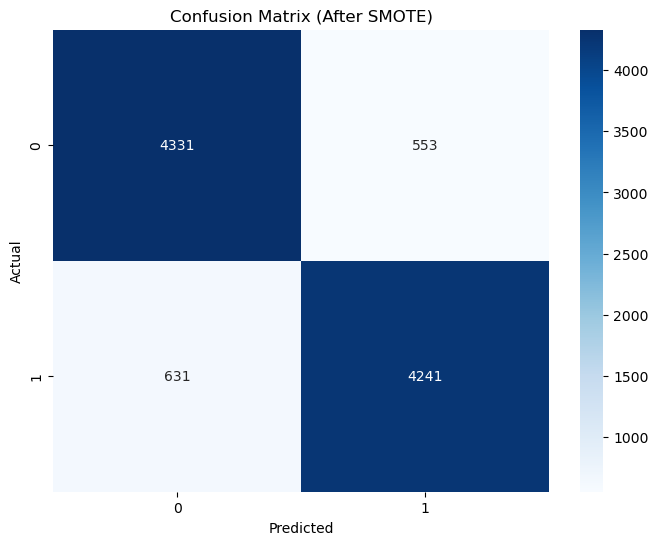

In [35]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test3, y_pred3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (After SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Interpreting the confusion matrix for Decision Tree Model:
1. True Negatives: 4,331 bookings correctly predicted as cancellations
2. False Positives: 553 bookings incorrectly predicted as non-cancellations
3. False Negatives: 631 bookings incorrectly predicted as cancellations
4. True Positives: 4,241 bookings correctly predicted as non-cancellations

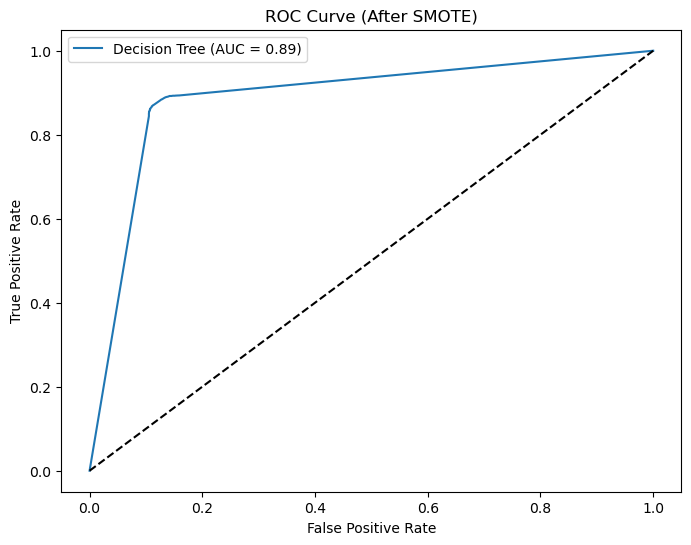

In [36]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test3, y_pred_proba3)
plt.plot(fpr, tpr, label='Decision Tree (AUC = ' + str(round(roc_auc_score(y_test3, y_pred_proba3), 2)) + ')')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (After SMOTE)')
plt.legend()
plt.show()

Our ROC curve for balanced class has an AUC of 0.89. This is a good model as out 100 predictions, it would predict 89 correctly. However, we need to do further parameter tuning to our model to improve it's performance. In that case, we shall build our Final Model and Evaluate it's performance and compare with the other models

### C. Building a Random Forest Model

In [ ]:
# Select features
selected_columns = ['no_of_adults', 'avg_price_per_room', 'repeated_guest', 
                   'market_segment_type', 'lead_time', 'arrival_year', 
                   'no_of_special_requests', 'booking_status']

df_selected = df[selected_columns]

# Prepare features and target
X = pd.get_dummies(df_selected.drop('booking_status', axis=1))
le = LabelEncoder()
y = le.fit_transform(df_selected['booking_status'])

# Split the data before applying SMOTE
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train4, y_train4)

# Print class distribution before and after SMOTE
print("Original training set class distribution:")
print(pd.Series(y_train4).value_counts())
print("\
Balanced training set class distribution:")
print(pd.Series(y_train_balanced).value_counts())

Original training set class distribution:
1    19551
0     9469
Name: count, dtype: int64
Balanced training set class distribution:
1    19551
0    19551
Name: count, dtype: int64


In [44]:
# Define functions for model creation and evaluation
def create_pipeline():
    return Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(random_state=42))
    ])

def evaluate_model(model, X, y, set_name=""):
    predictions = model.predict(X)
    proba_predictions = model.predict_proba(X)
    auc = roc_auc_score(y, proba_predictions[:, 1])
    
    print(f"\
Results for {set_name}:")
    print("\
Classification Report:")
    print(classification_report(y, predictions))
    print("\
Confusion Matrix:")
    print(confusion_matrix(y, predictions))
    print(f"\
AUC Score: {auc:.4f}")
    return auc, predictions, proba_predictions

In [68]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]}  # Minimum samples required at a leaf node



In [63]:

# Example: Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling
    ('model', RandomForestClassifier(random_state=42))  # Your model
])

# Define the parameter distributions
param_dist = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Set up RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_dist, n_iter=10, cv=3, 
    scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42
)

# Fit the randomized search to the balanced training data
random_search.fit(X_train_balanced, y_train_balanced)

# Get the best parameters found by the randomized search
print(f"Best Parameters: {random_search.best_params_}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_depth': 20}


In [67]:
# Get the best model
best_model = random_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=20, random_state=42))])

In [69]:
# Evaluate on training and test sets
train_auc, train_pred, train_proba = evaluate_model(best_model, X_train_balanced, y_train_balanced, "Training Set")
test_auc, test_pred, test_proba = evaluate_model(best_model, X_test4, y_test4, "Test Set")

Results for Training Set:
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     19551
           1       0.94      0.94      0.94     19551

    accuracy                           0.94     39102
   macro avg       0.94      0.94      0.94     39102
weighted avg       0.94      0.94      0.94     39102

Confusion Matrix:
[[18442  1109]
 [ 1165 18386]]
AUC Score: 0.9909
Results for Test Set:
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      2416
           1       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255

Confusion Matrix:
[[1983  433]
 [ 493 4346]]
AUC Score: 0.9378


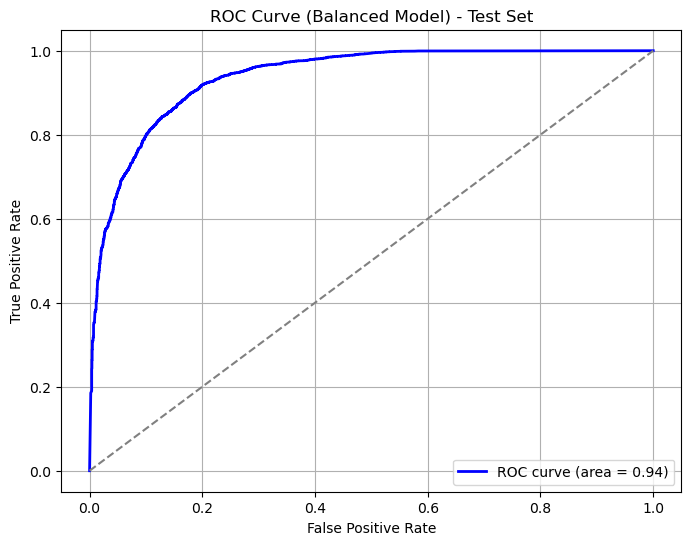

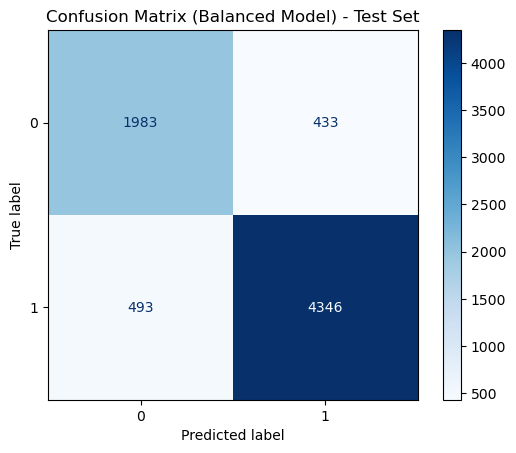

In [73]:
# Plot ROC Curve and Confusion Matrix for the balanced model
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay

# Plot ROC Curve
def plot_roc_curve(y_true, y_proba, set_name):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Balanced Model) - ' + set_name)
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

# Plot Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, set_name):
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Blues', values_format='d')
    plt.title('Confusion Matrix (Balanced Model) - ' + set_name)
    plt.show()

# Plot for Test Set
plot_roc_curve(y_test4, test_proba[:, 1], 'Test Set')
plot_confusion_matrix(y_test4, test_pred, 'Test Set')